# Prelab4

### import all libraries

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### load images

In [2]:
bag_left = cv.imread('backpack_left.png')
bag_right = cv.imread('backpack_right.png')
lena = cv.imread('lena.png')

bag_left_gray = cv.cvtColor(bag_left,cv.COLOR_BGR2GRAY)
bag_right_gray = cv.cvtColor(bag_right,cv.COLOR_BGR2GRAY)
lena_gray = cv.cvtColor(lena,cv.COLOR_BGR2GRAY)

### 1.1 SIFT matching

<Figure size 1800x1200 with 0 Axes>

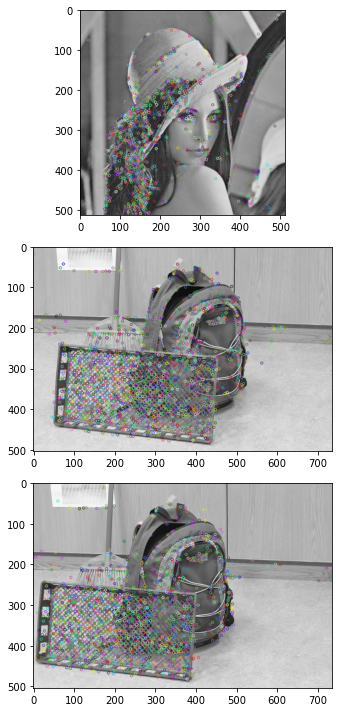

In [3]:
my_SIFT_instance = cv.SIFT_create()
mask = None
[keypoints_left,descriptors_left] = my_SIFT_instance.detectAndCompute(bag_left_gray,mask)
[keypoints_right,descriptors_right] = my_SIFT_instance.detectAndCompute(bag_right_gray,mask)
[keypoints_lena,descriptors_lena] = my_SIFT_instance.detectAndCompute(lena_gray,mask)

plt.figure(dpi=300)
plt.figure(figsize=(10,10))
lena_gray = cv.drawKeypoints(lena_gray,keypoints_lena,lena_gray)
plt.subplot(3,1,1)
plt.imshow(lena_gray)
bag_left_gray = cv.drawKeypoints(bag_left_gray,keypoints_left,bag_left_gray)
plt.subplot(3,1,2)
plt.imshow(bag_left_gray)
bag_right_gray = cv.drawKeypoints(bag_right_gray,keypoints_right,bag_right_gray)
plt.subplot(3,1,3)
plt.imshow(bag_right_gray)
plt.tight_layout()

### Match the images

<Figure size 1800x1200 with 0 Axes>

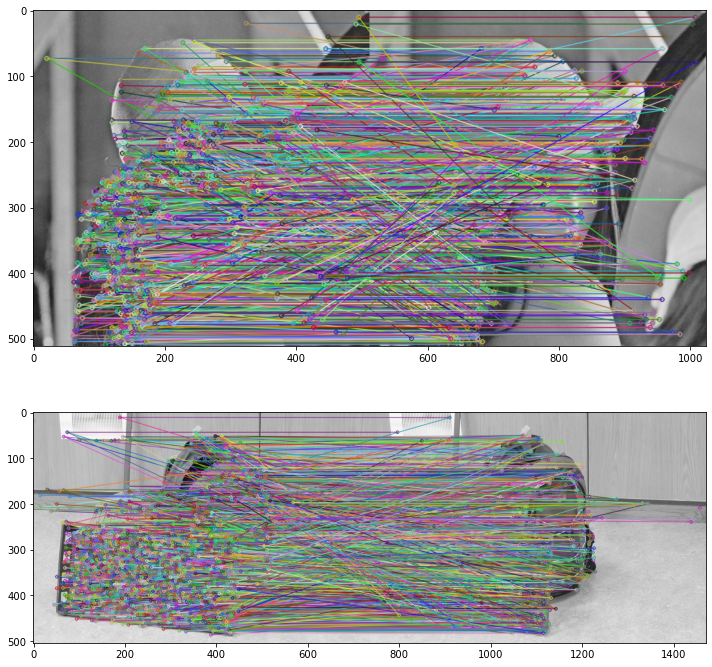

In [4]:
plt.figure(dpi=300)
plt.figure(figsize=(10,10))

bf = cv.BFMatcher()
lena_matches = bf.knnMatch(descriptors_lena,descriptors_lena, k=2)
match_pic1 = cv.drawMatchesKnn(lena_gray, keypoints_lena, lena_gray, keypoints_lena, lena_matches, None, flags=0)
plt.subplot(2,1,1)
plt.imshow(match_pic1)

bf = cv.BFMatcher()
bag_matches = bf.knnMatch(descriptors_left,descriptors_right, k=2)
match_pic2 = cv.drawMatchesKnn(bag_left_gray, keypoints_left, bag_right_gray, keypoints_right, bag_matches, None, flags=0)
plt.subplot(2,1,2)
plt.imshow(match_pic2)

plt.tight_layout()

### 1.2 Lowe’s Ratio Test

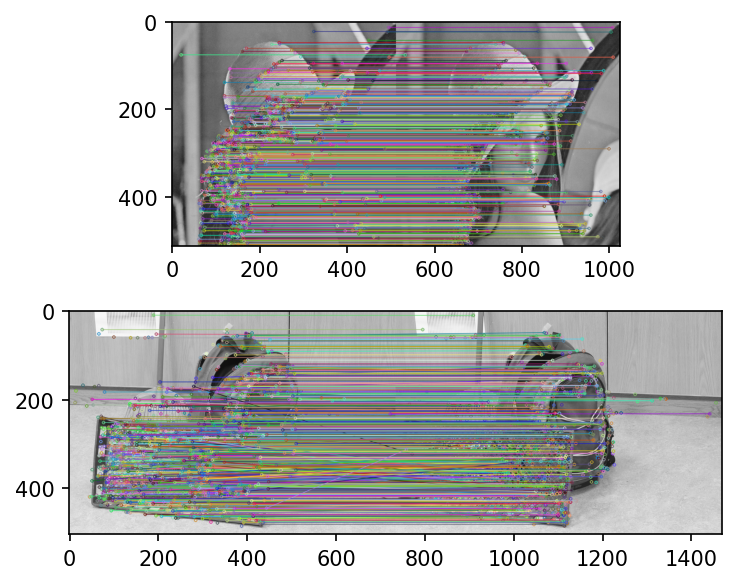

In [5]:
def LoweRatioTest(match):  
    good_distance = []
    distance = []
    ratio_match = []
    for m,n in match:
        distance.append(m.distance)
        ratio = (m.distance)/(n.distance)
        if ratio < 0.8:
            ratio_match.append([m])
            good_distance.append(m.distance)
    return ratio_match,good_distance,distance

lena_match,lena_good_distance,lena_distance = LoweRatioTest(lena_matches)
bag_match,bag_good_distance,bag_distance = LoweRatioTest(bag_matches)
plt.figure(dpi=150)

plt.subplot(2,1,1)
plt.imshow(cv.drawMatchesKnn(lena_gray, keypoints_lena, lena_gray, keypoints_lena, lena_match, None, flags=0))
plt.subplot(2,1,2)
plt.imshow(cv.drawMatchesKnn(bag_left_gray, keypoints_left, bag_right_gray, keypoints_right, bag_match, None, flags=0))
plt.tight_layout()

### 1.3 Histogram

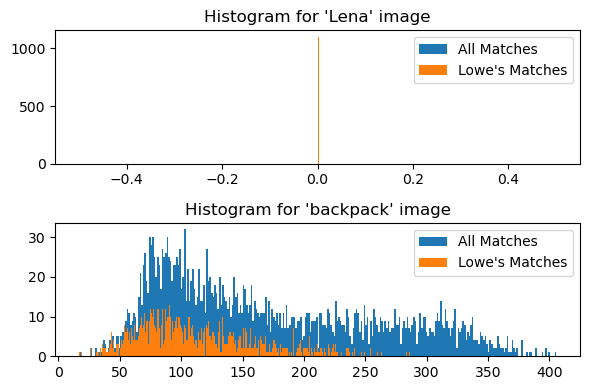

In [7]:
plt.figure(dpi=100)

plt.subplot(2,1,1)
plt.hist(lena_distance, 300,label="All Matches")
plt.hist(lena_good_distance, 300,label="Lowe's Matches")
plt.legend()
plt.title("Histogram for 'Lena' image")

plt.subplot(2,1,2)
plt.hist(bag_distance,300,label="All Matches")
plt.hist(bag_good_distance,300,label="Lowe's Matches")
plt.legend()
plt.title("Histogram for 'backpack' image")

plt.tight_layout()

### Q1 conclusion

#### After the Lowe's ratio test, some bad matches are removed, leaving only eligible matches, resulting in reduced counts on the y-axis. Lowe's Matches are effective in filtering out the good points. The distance will indicate how close those two spots are because the descriptor is in very high dimensional space; the smaller the value, the better the result. Because the difference between the left and right backpack images is modest, the distance between the well matched point is little after removing the bad matches with a long distance, thus the range of the x-axis is much reduced and moves slightly to the left. Because the two images are identical, the distance between them is zero, hence the Lena image is a vertical line.